In [1]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model, load_model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

import os

from PIL import Image

from matplotlib.pyplot import imshow

from random import randrange

from scipy.interpolate import interp1d

from skimage.color import rgb2gray, gray2rgb

Using TensorFlow backend.


In [2]:
model = load_model(r'C:\Users\Vee\Desktop\python\GAN\generator.h5')

C:\Users\Vee\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [364]:
bw = []
paths = []
for r, d, f in os.walk(r"D:\Downloads\painter-by-numbers-resized"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    bw.append(np.array(x))
del paths

In [365]:
bw = np.array(bw)
bw = bw/255
bw.shape

(30717, 128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


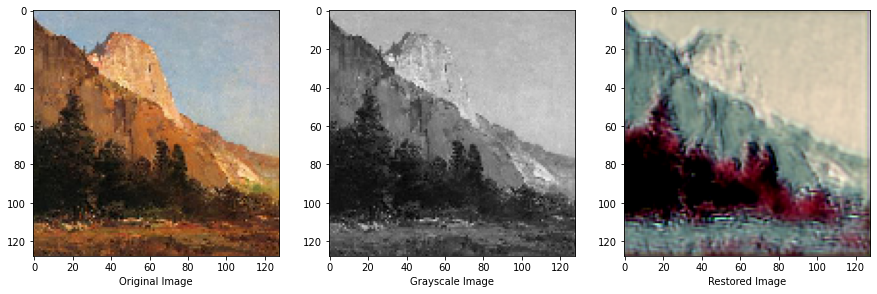

In [382]:
 #create plot
f, axarr = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,1,1]})
axarr[0].set_xlabel('Original Image', fontsize=10)
axarr[1].set_xlabel('Grayscale Image', fontsize=10)
axarr[2].set_xlabel('Restored Image', fontsize=10)

num = randrange(len(bw))

axarr[0].imshow(bw[num])
axarr[1].imshow(rgb2gray(bw[num]),cmap='gray')
#plotting super sampled image
random = rgb2gray(bw[num])
result = model.predict(random.reshape(1,128,128,1)/255)
result = np.array(result)
result = result * 255
result = result.astype(int)
axarr[2].imshow(result[0])

In [314]:
np.save(r'C:\Users\Vee\Desktop\python\GAN\BW\2.npy',result)

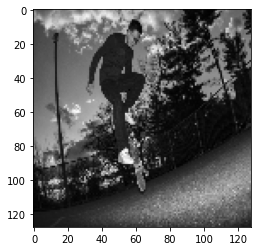

In [10]:
img = Image.open(r'D:\Downloads\DSC_0091170402364.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
x = rgb2gray(x[0])
imshow(x,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


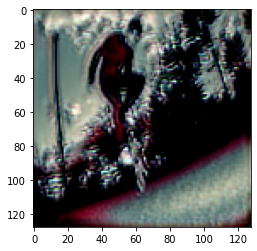

In [18]:
result = model.predict_on_batch(x.reshape(1,128,128,1)/255)
result = np.array(result)
result = result.reshape(128,128,3)
result = result * 255
result = result.astype(int)
imshow(result)